In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
data= pd.read_csv("/content/WineQT.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


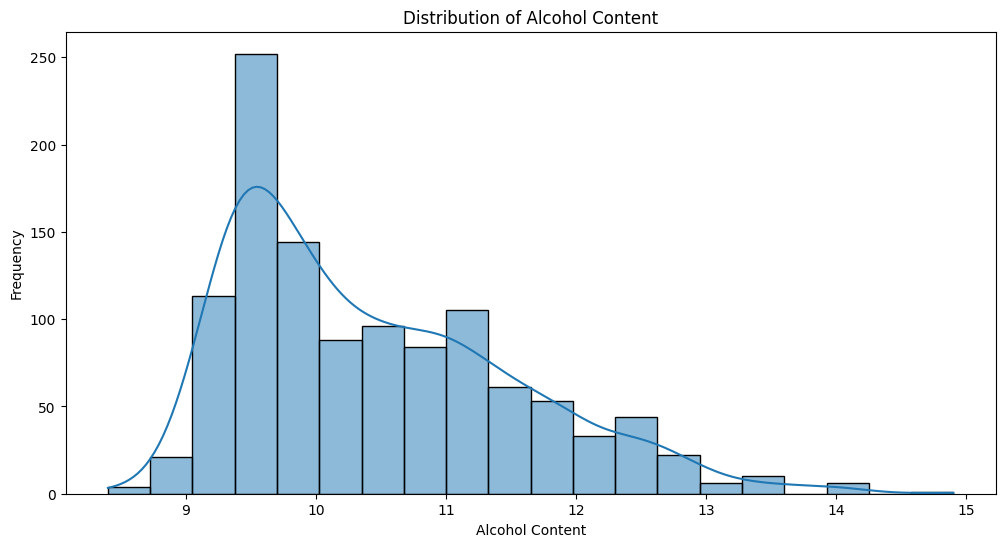

In [ ]:
# Create histograms for some of the features
plt.figure(figsize=(12, 6))
sns.histplot(data['alcohol'], bins=20, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

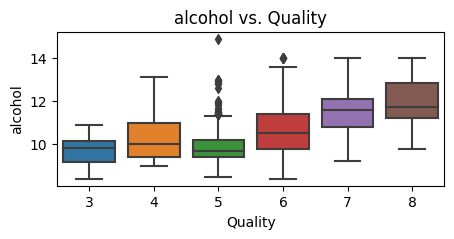

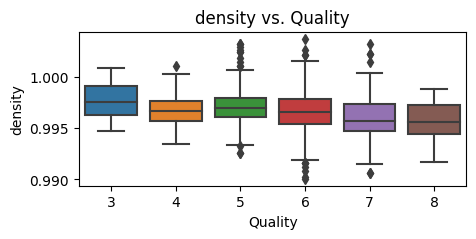

In [ ]:
# Box plots for wine quality vs. features
quality_vs_features = ['alcohol', 'density']
for feature in quality_vs_features:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f'{feature} vs. Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()

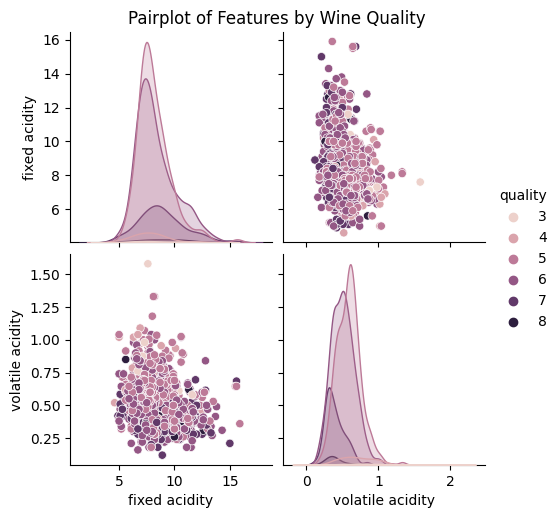

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(data, vars=['fixed acidity', 'volatile acidity'], hue='quality')
plt.suptitle('Pairplot of Features by Wine Quality', y=1.02)
plt.show()

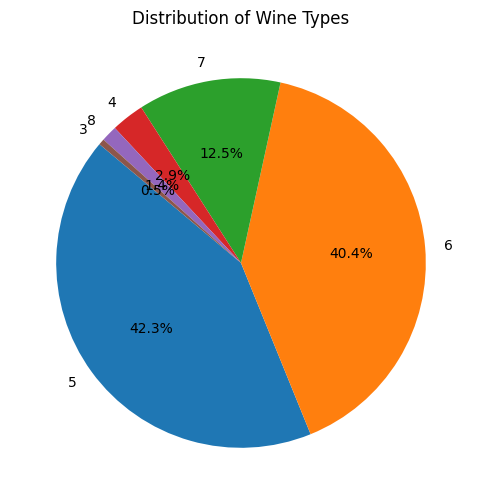

In [ ]:
# Pie chart for wine type distribution
wine_type_counts = data['quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(wine_type_counts, labels=wine_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wine Types')
plt.show()

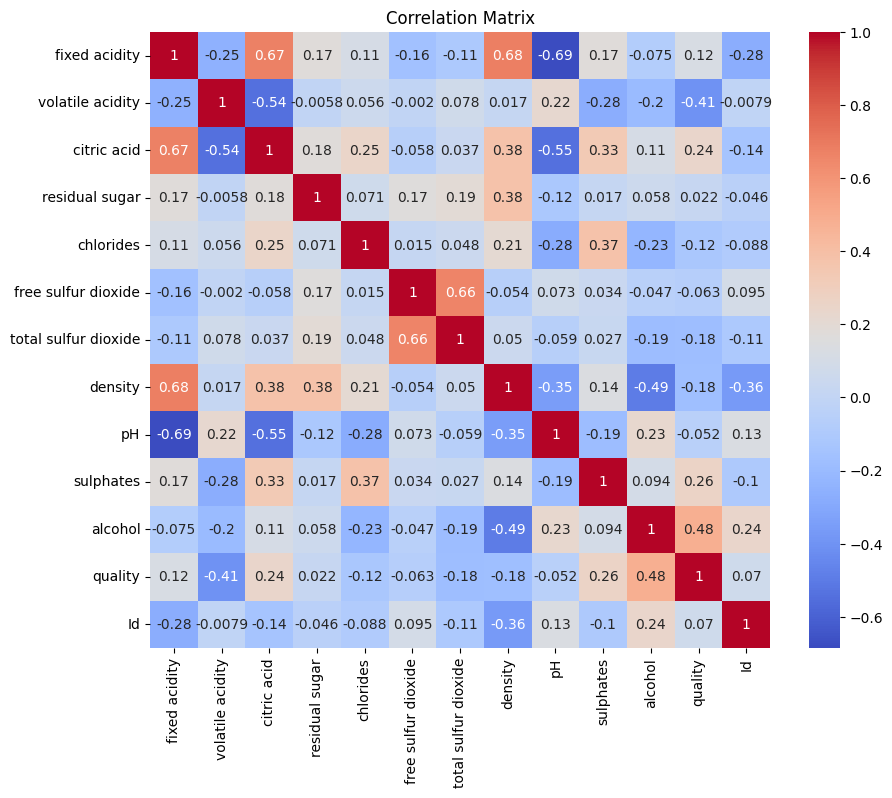

In [ ]:
# Create a correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to address class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)



In [ ]:
# Oversample the minority classes using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a list of classifiers
models = [
    ("Random Forest", RandomForestClassifier(class_weight=dict(zip(np.unique(y_train_resampled), class_weights)))),
    ("Decision Tree", DecisionTreeClassifier(class_weight=dict(zip(np.unique(y_train_resampled), class_weights)), random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
]


In [ ]:

# Initialize results dictionary
results = {}

# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy


In [ ]:
# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

    # Print the accuracy score for each model
    print(f"{model_name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.59
Decision Tree Accuracy: 0.59
Gradient Boosting Accuracy: 0.60


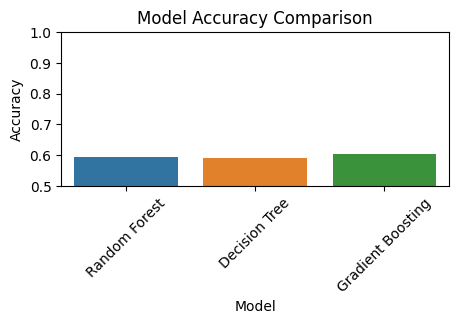

In [ ]:

# Create a bar plot to compare model accuracies
plt.figure(figsize=(5, 2))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis limits
plt.xticks(rotation=45)
plt.show()